کلا در حوزه **پردازش داده های متنی** با **دو دسته از مسائل** مواجه هستیم. اون هایی که دارای خروجی با با ناظر و از نوع کلاسیفیکیشن هستن و اون هایی که هیچ لیبلی ندارند. این پروژه از نوع مسائل **کلاسیفیکیشن** است
<br>

به مفهموم خیلی مهمی در علم آمار **رابطه بیز** بود
<br>
P(a|b)=P(b|a) * P(a)   / P(b)
<br>
که با استفاده از این رابطه خیلی در **مسائل متنی** استفاده میشه

<br>

#### :معمولا روش کلی کار هم به این صورت هست
<br>
ابتدا متن ها اصلاح و موارد نال یا خالی یا مواردی که نیازی نیست در پردازش ها به کار برده بشن حذف می شوند
<br>
بعد داده ها به فضای برداری و عددی برده میشن
<br>
و در نهایت با پیاده سازی یک الگوریتم کلاسیفیکیشن به یک پیشبینی قابل قبولی می رسیم


# Text Classification

## درباره داده ها 

در این دیتاست با مجموعه ای از کامنت ها مربوط به یک سایت دانلود فیلم و در نهایت لیبل برای هر یک از آن ها هستیم به این صورت که آیا این کامنت مثبت است یا منفی



**Task: Perform imports and load the dataset into a pandas DataFrame**
For this exercise you can load the dataset from `'../DATA/moviereviews.csv'`.

 ## فراخوانی کتابخانه ها

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [4]:
df.head()

label                                             review
0   neg  how do films like mouse hunt get into theatres...
1   neg  some talented actresses are blessed with a dem...
2   pos  this has been an extraordinary year for austra...
3   pos  according to hollywood movies made in last few...
4   neg  my first press screening of 1998 and already i...

## داده های گم شده
سعی می کنیم داده های گم شده را از میان داده ها حذف کنیم. توجه کنین که در مسائل متن محور، معمولا نمی تونیم مقدار مناسبی را با داده های گم شده جایگزاری کنیم بنابرین باید آن ها را از دیتا ها حذف کنیم
<br>


**در مبحث مربوط به داده های گم شده در مسائل تکست محور با دو نوع از این دیتا ها مواجه هستیم**
<br>

1: آن هایی که به صورت نال هستند
<br>
2: "" or  "   "
<br>
یعنی آن هایی که به صورت جای خالی یا اسپیس ثبت گردیده اند که در ادامه با هر دو این چالش ها رو به رو خواهیم شد

In [5]:
# مشاهده داده های نال
df.isnull().sum()

label      0
review    35
dtype: int64

**حذف داده های نال**

In [8]:
df = df.dropna()

**سر و کله زدن با داده هایی که به صورت جای خالی ثبت گردیده اند**

In [9]:
df['review'].str.isspace().sum()

27

In [10]:
df[df['review'].str.isspace()]

label review
57     neg       
71     pos       
147    pos       
151    pos       
283    pos       
307    pos       
313    neg       
323    pos       
343    pos       
351    neg       
427    pos       
501    neg       
633    pos       
675    neg       
815    neg       
851    neg       
977    neg       
1079   neg       
1299   pos       
1455   neg       
1493   pos       
1525   neg       
1531   neg       
1763   neg       
1851   neg       
1905   pos       
1993   pos

علامت
<br>
**~**
<br>
نتیجه را بر عکس می کند
<br>

In [11]:
df = df[~df['review'].str.isspace()]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**مشاهده پراکندگی لیبل های مختلف که در اینجا دو نوع مثبت و منفی است**

In [13]:
df['label'].value_counts()

pos    969
neg    969
Name: label, dtype: int64

## EDA 
## کاوش در میان داده ها
در ادامه سعی می کنیم 20 کلمه برتر هر کلاس را به جز کلمه انگلیسی، استخراج کنیم

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

منظور از 
<br>
**stop_words**
<br> 
کلماتی است که عموما اهمیتی برای ما ندارند. در زبان فارسی کلماتی از جمله یا، و، اگر، پس و ... که در اینجا و صرفا به عنوان نمونه، کلمه ای خاص را برابر این پارامتر قرار دادیم

In [15]:
cv = CountVectorizer(stop_words='english')

In [16]:
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [17]:
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Train | Test Split 

In [25]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Training a Mode

در ادامه یک پایپ لاین می سازیم که کار اصلی آن بردن مسئله به **فضای برداری** و سپس ترین کردن آن به یک مدل یادگیری باناظر که در اینجا یک بردار پیشتیبان است باشد


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [27]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC()),])

In [28]:
pipe.fit(X_train, y_train)  

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

## ارزیابی مدل
در نهایت توسط شاخص های مناسب دقت مدل را اندازه گیری می کنیم

In [30]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [79]:
preds = pipe.predict(X_test)

In [80]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



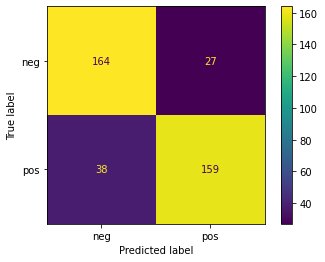

In [81]:
plot_confusion_matrix(pipe,X_test,y_test)